<a href="https://colab.research.google.com/github/yasminbottan/regressao/blob/main/Projeto_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WINE QUALITY DATASET**

## **Resumo:**
O Wine Quality Dataset é um conjunto de dados de vinhos tintos e vinhos brancos. Devido a questões de privacidade e logística, apenas variáveis ​​físico-químicas (entradas) e sensoriais (target) estão disponíveis. Não há dados sobre tipos de uva, marca de vinho, preço de venda do vinho, etc.

## **Variáveis:**
* Acidez fixa
* Acidez volátil
* Ácido cítrico
* Açúcar residual
* Cloretos
* Dióxido de enxofre livre
* Dióxido de enxofre total
* Densidade
* pH
* Sulfatos
* Álcool

## **Target:**
* Qualidade: pontuação entre 0 e 10

## **Fonte:**
https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

# **BIBLIOTECAS, FONTES E BASE DE DADOS**

In [ ]:
# manipulação de dados
import pandas as pd
import numpy as np

# visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from tabulate import tabulate

# regressão linear
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# métricas de avaliação
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error, max_error, mean_squared_log_error

In [ ]:
# Carregar base de dados
df = pd.read_csv('winequality-red.csv', encoding='latin1', delimiter=',')

# **ANÁLISE EXPLORATÓRIA**



In [ ]:
# Verificação das informações da tabela
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Verificando formato da base criada
df.shape

(1599, 12)

In [ ]:
# dtype de cada coluna
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [ ]:
# verifica missing values
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**Conclusão:** Não há valores nulos

In [ ]:
# verifica linhas duplicadas
df.duplicated().sum()

240

**Conclusão:** Há 240 linhas duplicadas que devem ser excluidas

In [ ]:
# Excluir linhas duplicadas
df = df.drop_duplicates()

# verifica linhas duplicadas
df.duplicated().sum()

0

**Conclusão:** Linhas duplicadas foram excluidas

In [ ]:
# sumário estatístico df_total
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Conclusão:** Não foi identificado nenhum valor fora da normalidade

In [ ]:
# selecionando o target
target = 'quality'

# lista apenas com os nomes das variáveis numéricas
num_vars = [col for col in df.columns if col not in [target]]

# separando a base em treino e teste
# nesse momento iremos utilizar somente as variáveis numéricas
X = df.filter(num_vars).copy()
y = df['quality'].copy()

# selecionando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=30)

## **APLICANDO REGRESSÃO LINEAR MÚLTIPLA**


In [ ]:
# instalando o pacote feature-engine
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 5.4 MB/s eta 0:00:00


### **OPÇÕES NORMALMENTE USADAS:**

*   Variáveis Númericas: MeanMedianImputer, SklearnTransformerWrapper
*   Variáveis Categóricas: CategoricalImputer, OneHotEncoder

**Conclusão:** Como temos apenas variáveis numéricas, será utilizado  MeanMedianImputer e SklearnTransformerWrapper para o pré processamento da base de dados.



In [ ]:
from feature_engine.imputation import MeanMedianImputer
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.pipeline import Pipeline

data_linear_pipe = Pipeline(steps=[
    ('numeric_imputer', MeanMedianImputer(variables=num_vars)),
    ('standard_scaler', SklearnTransformerWrapper(transformer=StandardScaler(), variables=num_vars))
])

In [ ]:
data_linear_pipe.fit_transform(X_train).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
270,-0.249006,0.070013,-1.073163,1.108056,-0.043497,1.089187,0.405488,-0.134917,0.346569,0.054684,0.263366
839,-1.328048,-0.179510,-1.174729,-0.245266,0.052486,-0.286923,-0.629937,-0.150797,0.993854,-1.105149,-0.385337
1284,-0.760131,-0.623107,-0.412989,-0.170082,-0.350641,0.204545,-0.334101,-1.055974,0.540754,-0.583224,0.448709
842,1.284370,-0.179510,0.907361,0.055472,0.570792,1.777242,0.612573,0.172102,-0.494902,0.344642,0.448709
1060,1.852287,-1.676650,1.516753,-0.546005,-0.293051,-1.269859,-1.162441,0.712032,-1.077459,0.228659,-0.478008


# **MODEL TRAINING**

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.8 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
models = [
    ('ridge_reg', Ridge(random_state=42)),
    ('decision_tree', DecisionTreeRegressor(random_state=42)),
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('lgbm', LGBMRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42)),
    ('catboost', CatBoostRegressor(random_state=42))
]

In [ ]:
# Para visualizer as métricas disponíveis para o cross_val_score
from sklearn.metrics import get_scorer_names

# Exibir as métricas disponíveis
print(get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_max_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples'

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

# definindo a estratégia de validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# definindo a lista de métricas utilizadas
metricas = ['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']

# criando um dicionário irá conter os resultados dos modelos
dicionario_resultados = {'model': [], 'r2': [], 'mae': [], 'rmse': []}

# treinando e avaliando todos os modelos que estão na lista `models`
for model in models:
    model_pipe = Pipeline(steps=data_linear_pipe.steps + [model])

    cv_results = cross_validate(estimator=model_pipe, X=X_train, y=y_train, scoring=metricas, cv=kfold, n_jobs=-1)
    cv_results_df = pd.DataFrame(cv_results)

    r2 = cv_results_df.mean().loc['test_r2']
    mae = np.abs(cv_results_df.mean().loc['test_neg_mean_absolute_error'])
    rmse = np.abs(cv_results_df.mean().loc['test_neg_root_mean_squared_error'])

    # populando a tabela com os resultados
    dicionario_resultados['model'].append(model_pipe.steps[-1][0])
    dicionario_resultados['r2'].append(r2)
    dicionario_resultados['mae'].append(mae)
    dicionario_resultados['rmse'].append(rmse)

df_resultados = pd.DataFrame(dicionario_resultados)

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
df_resultados.sort_values(by='mae')

,model,r2,mae,rmse
2,random_forest,0.3519,0.5040,0.6537
5,catboost,0.3436,0.5058,0.6564
3,lgbm,0.3186,0.5161,0.6696
0,ridge_reg,0.3198,0.5172,0.6706
1,decision_tree,-0.2786,0.6210,0.9193
4,xgb,NaN,NaN,NaN


# **VISUALIZANDO AS PREDIÇÕES**



In [ ]:
best_model = Pipeline(data_linear_pipe.steps + [('random_forest', RandomForestRegressor(random_state=42))])

best_model.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)
y_pred_test  = best_model.predict(X_test)

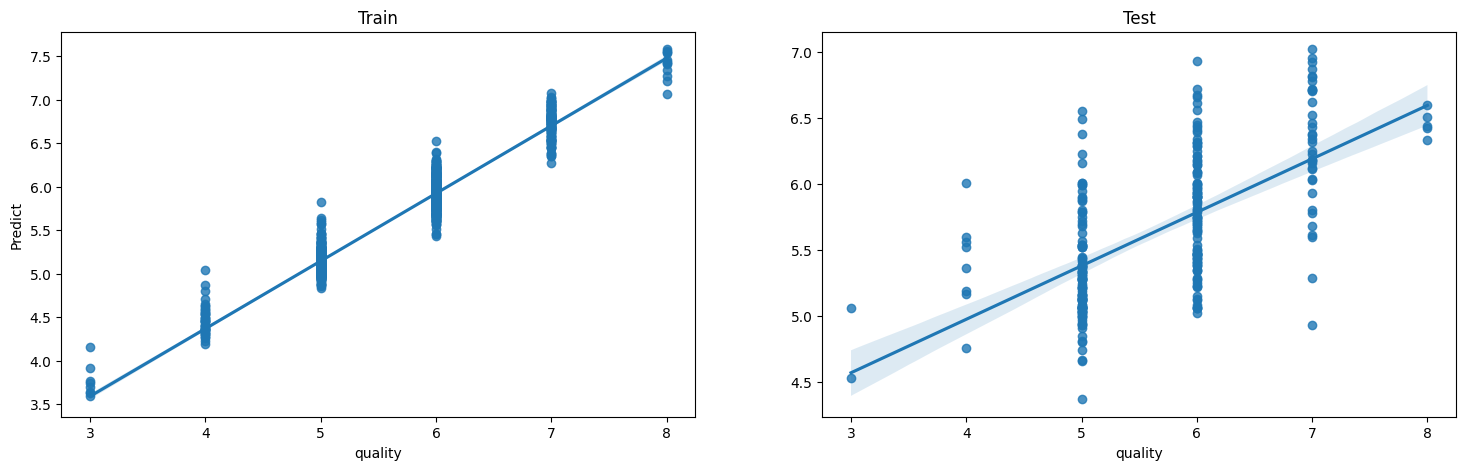

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(18,5), nrows=1, ncols=2)
sns.regplot(x=y_train, y=y_pred_train, ax=ax[0])
sns.regplot(x=y_test, y=y_pred_test, ax=ax[1])
ax[0].set_ylabel('Predict')
ax[0].set_title('Train')
ax[1].set_title('Test');

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error


def adjusted_r2(y_esperado, y_previsto, X_treino):
  R2 = r2_score(y_esperado, y_previsto)
  N = len(y_esperado)
  p = X_treino.shape[1]

  r2_ajustado = (1 - ((1 - R2) * (N - 1)) / (N - p - 1))
  return r2_ajustado

r2_ajustado = adjusted_r2(y_test, y_pred_test, X_train)
print('R2 Ajustado:', r2_ajustado)
print()
mae = mean_absolute_error(y_test, y_pred_test)
print('MAE:', mae)

mse = mean_squared_error(y_test, y_pred_test)
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

def calcular_rmsle(y_true, y_pred):
    """
    Calcula o RMSLE (Root Mean Squared Logarithmic Error) manualmente.
    """
    # Adicionar 1 aos valores para evitar problemas com log(0)
    log_true = np.log(y_true + 1)
    log_pred = np.log(y_pred + 1)

    # Calcular o erro logarítmico quadrado
    log_error_squared = (log_pred - log_true) ** 2

    # Calcular a média do erro
    mean_log_error = np.mean(log_error_squared)

    # Retornar a raiz quadrada da média
    return np.sqrt(mean_log_error)

rmsle = calcular_rmsle(y_test, y_pred_test)
print('RMSLE:', rmsle)
print()

m_error = max_error(y_test, y_pred_test)
print('Max Error:', m_error)

mape = mean_absolute_percentage_error(y_test, y_pred_test)
print('MAPE:', mape)


R2 Ajustado: 0.3615892938491181

MAE: 0.49363970588235295
MSE: 0.42966875
RMSE: 0.6554912280114815
RMSLE: 0.1001154296160785

Max Error: 2.0700000000000003
MAPE: 0.08945238095238095


# **FEATURE SELECTION**

In [ ]:
from feature_engine.selection import SelectByShuffling

X_train_transformed = data_linear_pipe.fit_transform(X_train)
X_test_transformed  = data_linear_pipe.transform(X_test)

shuffle = SelectByShuffling(estimator=CatBoostRegressor(), scoring='neg_mean_absolute_error', cv=5)

shuffle.fit(X_train_transformed, y_train)

print(f"Qtde de variáveis antes da remoção: {X_train_transformed.shape[1]}")
print(f"Qtde de variáveis a serem removidas: {len(shuffle.features_to_drop_)}")
print(f"Qtde de variáveis depois da remoção: {X_train_transformed.shape[1] - len(shuffle.features_to_drop_)}")

X_train_transformed_reduzido = shuffle.transform(X_train_transformed)
X_test_transformed_reduzido  = shuffle.transform(X_test_transformed)

catboost = CatBoostRegressor(random_state=42)

catboost.fit(X_train_transformed_reduzido, y_train)

y_pred_train = catboost.predict(X_train_transformed_reduzido)
y_pred_test  = catboost.predict(X_test_transformed_reduzido)

A saída de streaming foi truncada nas últimas 5000 linhas.
7:	learn: 0.7425240	total: 21.4ms	remaining: 2.65s
8:	learn: 0.7355464	total: 23.1ms	remaining: 2.54s
9:	learn: 0.7296310	total: 29.1ms	remaining: 2.88s
10:	learn: 0.7245220	total: 31.9ms	remaining: 2.86s
11:	learn: 0.7180979	total: 35ms	remaining: 2.88s
12:	learn: 0.7114281	total: 37ms	remaining: 2.81s
13:	learn: 0.7046261	total: 38.8ms	remaining: 2.73s
14:	learn: 0.6991200	total: 40.6ms	remaining: 2.67s
15:	learn: 0.6937180	total: 42.5ms	remaining: 2.62s
16:	learn: 0.6881642	total: 44.4ms	remaining: 2.57s
17:	learn: 0.6833569	total: 46.3ms	remaining: 2.52s
18:	learn: 0.6788411	total: 48.1ms	remaining: 2.48s
19:	learn: 0.6744292	total: 50ms	remaining: 2.45s
20:	learn: 0.6697025	total: 51.8ms	remaining: 2.42s
21:	learn: 0.6655691	total: 53.6ms	remaining: 2.38s
22:	learn: 0.6613519	total: 55.5ms	remaining: 2.36s
23:	learn: 0.6582284	total: 57.3ms	remaining: 2.33s
24:	learn: 0.6544154	total: 59.5ms	remaining: 2.32s
25:	learn: 0.6

In [ ]:
r2_ajustado = adjusted_r2(y_test, y_pred_test, X_train)
print('R2 Ajustado:', r2_ajustado)
print()
mae = mean_absolute_error(y_test, y_pred_test)
print('MAE:', mae)

mse = mean_squared_error(y_test, y_pred_test)
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

def calcular_rmsle(y_true, y_pred):
    """
    Calcula o RMSLE (Root Mean Squared Logarithmic Error) manualmente.
    """
    # Adicionar 1 aos valores para evitar problemas com log(0)
    log_true = np.log(y_true + 1)
    log_pred = np.log(y_pred + 1)

    # Calcular o erro logarítmico quadrado
    log_error_squared = (log_pred - log_true) ** 2

    # Calcular a média do erro
    mean_log_error = np.mean(log_error_squared)

    # Retornar a raiz quadrada da média
    return np.sqrt(mean_log_error)

rmsle = calcular_rmsle(y_test, y_pred_test)
print('RMSLE:', rmsle)
print()
m_error = max_error(y_test, y_pred_test)
print('Max Error:', m_error)

mape = mean_absolute_percentage_error(y_test, y_pred_test)
print('MAPE:', mape)

R2 Ajustado: 0.3222234043313714

MAE: 0.5176359008539189
MSE: 0.45616312482605564
RMSE: 0.6753984933548902
RMSLE: 0.1038864046491699

Max Error: 2.0908882525554358
MAPE: 0.09388797097530713


# **TESTANDO OUTROS PIPELINES**

Foi visto que a performance do modelo estudado está muito a quem do esperado.
Isso pode estar ocorrendo por diversos fatores como:

1.  Outliers Presentes: são valores extremos que diferem significativamente da maioria dos dados e podem distorcer análises estatísticas.
2.  Distribuição Enviesada: têm assimetria em sua distribuição, com cauda longa à esquerda (negativo) ou à direita (positivo).

### **Outliers Presentes:**
*Visualização em Boxplot*

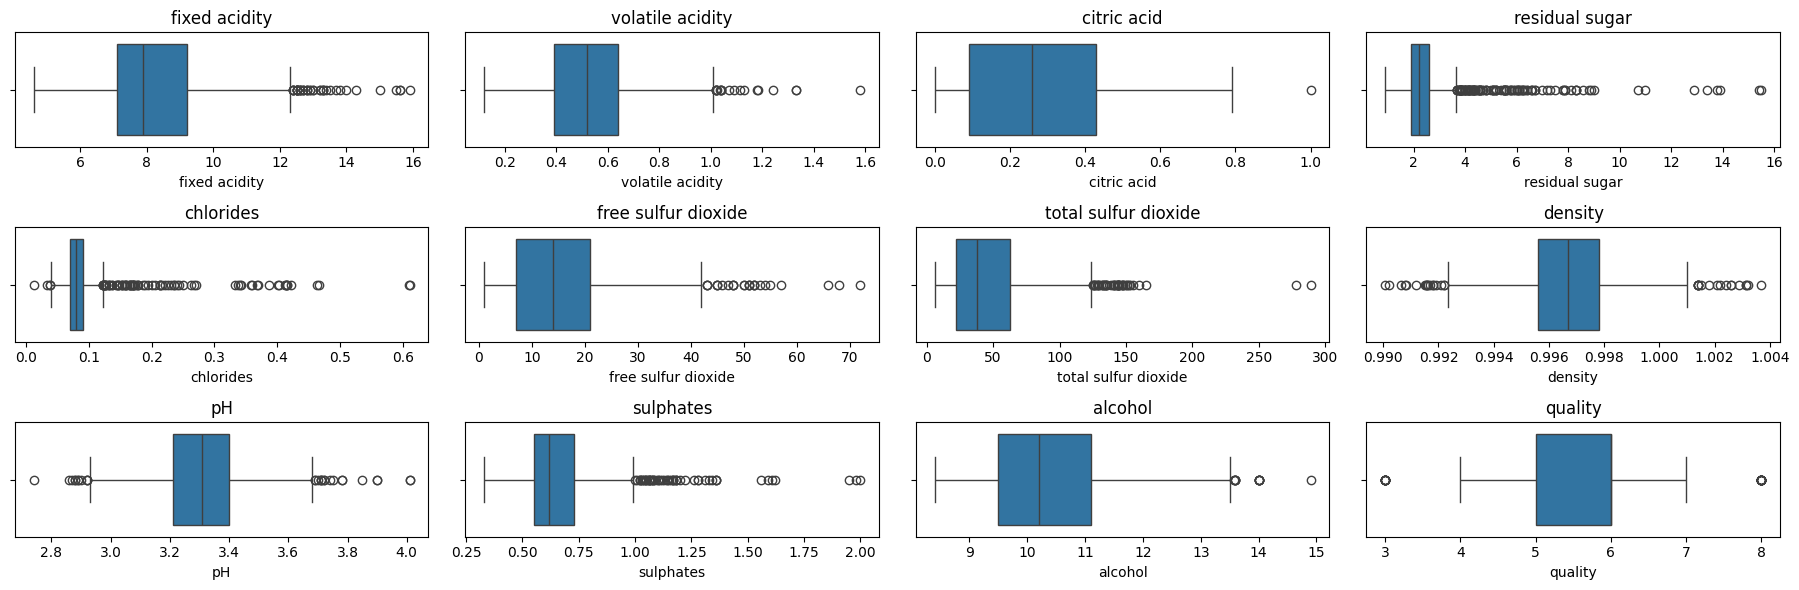

In [ ]:
# Configuração dos subplots
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(18, 6))
ax = ax.flatten()  # Transformar a matriz de eixos em uma lista unidimensional

# Lista de colunas
columns = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'quality'
]

# Criar boxplots para cada coluna
for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, ax=ax[i], orient='h')  # Gráficos horizontais
    ax[i].set_title(col)  # Adicionar título para cada gráfico

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

### **Distribuição Enviesada:**
*Visualização em Histograma*

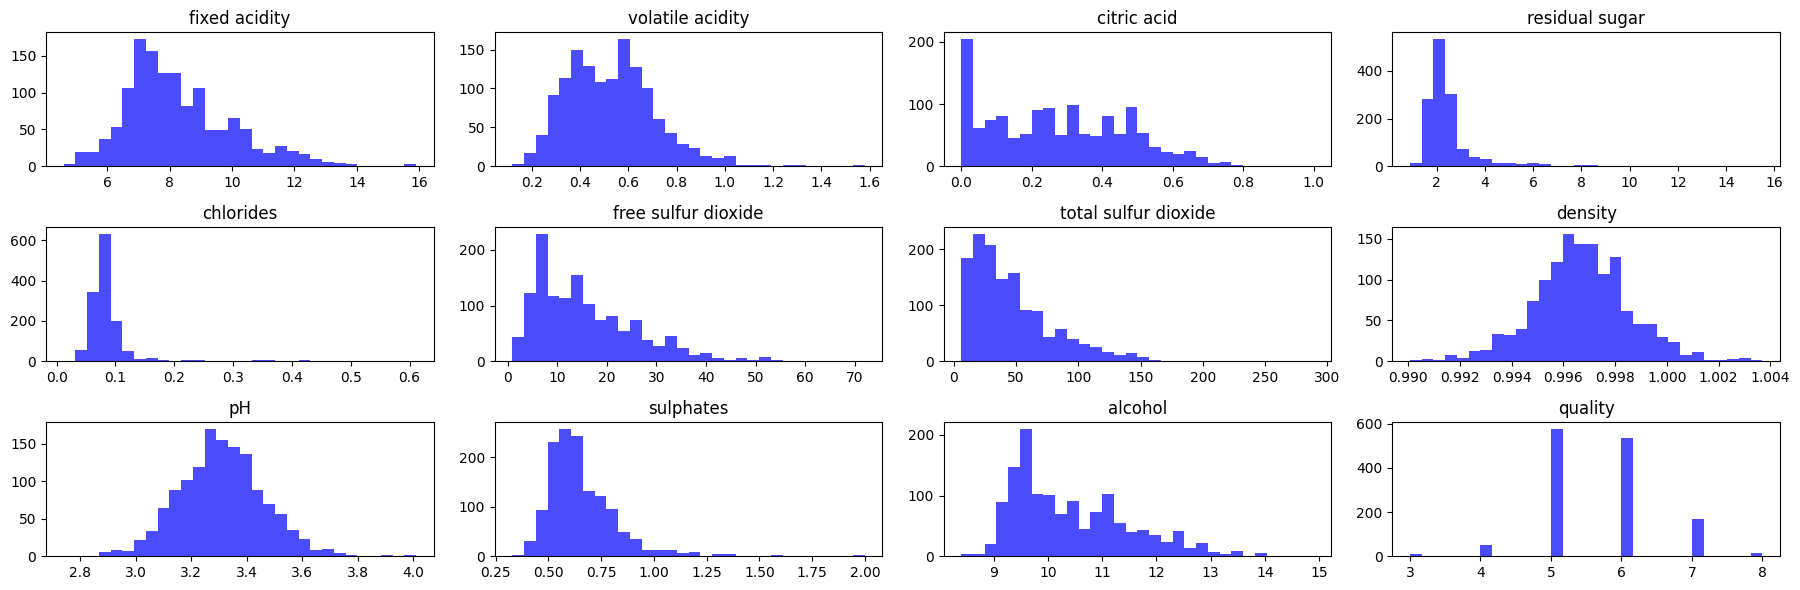

In [ ]:
import matplotlib.pyplot as plt

# Configurar o número de subplots
num_cols = len(df.columns)
cols_per_row = 4  # Número de gráficos por linha
num_rows = (num_cols + cols_per_row - 1) // cols_per_row  # Calcular número de linhas

# Criar subplots
fig, ax = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(18, num_rows * 2))
ax = ax.flatten()  # Transformar matriz de eixos em lista unidimensional

# Criar histogramas para cada coluna
for i, col in enumerate(df.columns):
    if pd.api.types.is_numeric_dtype(df[col]):  # Verificar se a coluna é numérica
        ax[i].hist(df[col].dropna(), bins=30, color='blue', alpha=0.7)  # Histograma
        ax[i].set_title(col)  # Título do gráfico
    else:
        ax[i].axis('off')  # Desligar eixos para colunas não numéricas

# Desligar eixos extras, se houver
for j in range(i + 1, len(ax)):
    ax[j].axis('off')

# Ajustar layout
plt.tight_layout()
plt.show()

### **Distribuição Enviesada:**
*Coeficiente de assimetria (skewness):
Valores próximos de 0 indicam simetria; valores maiores ou menores indicam viés*

In [ ]:
# Calcular e exibir skewness para todas as colunas numéricas
for col in df.select_dtypes(include='number').columns:
    skewness = df[col].skew()
    print(f"Skewness da coluna '{col}': {skewness}")


Skewness da coluna 'fixed acidity': 0.9410413664561449
Skewness da coluna 'volatile acidity': 0.7292789463991854
Skewness da coluna 'citric acid': 0.31272554238899036
Skewness da coluna 'residual sugar': 4.548153403940447
Skewness da coluna 'chlorides': 5.502487294623722
Skewness da coluna 'free sulfur dioxide': 1.2265794991760643
Skewness da coluna 'total sulfur dioxide': 1.5403680777213933
Skewness da coluna 'density': 0.04477785573116107
Skewness da coluna 'pH': 0.2320322752014824
Skewness da coluna 'sulphates': 2.4065046145674196
Skewness da coluna 'alcohol': 0.8598411692032926
Skewness da coluna 'quality': 0.19240658731658308


# **NOVO PRÉ PROCESSAMENTO DOS DADOS**

Opções de Melhorias:

### **RobustScaler:**
* Escala os dados baseando-se nos quartis, ignorando valores extremos (outliers).
* Útil para manter a robustez ao impacto de valores extremos.

### **QuantileTransformer:**
* Transforma os dados para seguir uma distribuição uniforme ou gaussiana.
* Ajuda a reduzir o viés e distribuições assimétricas.
* Possui o parâmetro output_distribution para especificar o tipo de transformação desejada:

    "uniform": Para mapeamento em uma distribuição uniforme.

    "normal": Para aproximação gaussiana.

### **PowerTransformer:**
* Aplica uma transformação para tornar os dados mais normais (Gaussianos).
* Útil para reduzir o viés, especialmente em dados assimétricos.
* Métodos suportados:

    Yeo-Johnson: Funciona com valores positivos e negativos.
    
    Box-Cox: Apenas para valores positivos.

In [ ]:
from sklearn.preprocessing import RobustScaler, QuantileTransformer, PowerTransformer
from feature_engine.imputation import MeanMedianImputer
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.pipeline import Pipeline

# Pipeline usando RobustScaler
data_robust_pipe = Pipeline(steps=[
    ('numeric_imputer', MeanMedianImputer(variables=num_vars)),  # Imputação
    ('robust_scaler', SklearnTransformerWrapper(transformer=RobustScaler(), variables=num_vars))  # Escalamento robusto
])

# Pipeline usando QuantileTransformer
data_quantile_pipe = Pipeline(steps=[
    ('numeric_imputer', MeanMedianImputer(variables=num_vars)),  # Imputação
    ('quantile_transformer', SklearnTransformerWrapper(
        transformer=QuantileTransformer(output_distribution='normal'),  # Aproximação gaussiana
        variables=num_vars
    ))
])

# Pipeline usando PowerTransformer
data_power_pipe = Pipeline(steps=[
    ('numeric_imputer', MeanMedianImputer(variables=num_vars)),  # Imputação
    ('power_transformer', SklearnTransformerWrapper(
        transformer=PowerTransformer(method='yeo-johnson'),  # Suporta valores positivos e negativos
        variables=num_vars
    ))
])


In [ ]:
data_robust_pipe.fit_transform(X_train).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
270,0.0000,0.1000,-0.5507,2.5714,0.3333,0.8667,0.5476,-0.1267,0.2500,0.2778,0.3750
839,-0.8636,-0.0800,-0.6087,0.0000,0.5714,-0.0667,-0.2857,-0.1403,0.7500,-0.8333,-0.0625
1284,-0.4091,-0.4000,-0.1739,0.1429,-0.4286,0.2667,-0.0476,-0.9140,0.4000,-0.3333,0.5000
842,1.2273,-0.0800,0.5797,0.5714,1.8571,1.3333,0.7143,0.1357,-0.4000,0.5556,0.5000
1060,1.6818,-1.1600,0.9275,-0.5714,-0.2857,-0.7333,-0.7143,0.5973,-0.8500,0.4444,-0.1250


In [ ]:
data_quantile_pipe.fit_transform(X_train).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
270,-0.0125,0.0955,-0.8644,1.4285,0.4907,1.0379,0.6135,-0.1511,0.3468,0.3508,0.3763
839,-1.7862,-0.1119,-0.9959,0.0226,0.7185,-0.0628,-0.4626,-0.1676,1.0619,-1.6793,-0.1169
1284,-0.7919,-0.5063,-0.2953,0.2047,-0.6120,0.4102,-0.0804,-1.1694,0.5999,-0.5835,0.5178
842,1.2154,-0.1119,0.7447,0.6674,1.4605,1.5336,0.7782,0.2072,-0.5078,0.6272,0.5178
1060,1.5543,-2.0854,1.4980,-0.9147,-0.4156,-2.1831,-2.4320,0.8074,-1.1425,0.5164,-0.2072


In [ ]:
data_power_pipe.fit_transform(X_train).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
270,-0.1006,0.1737,-1.1123,1.5790,0.3263,1.1208,0.6910,-0.1333,0.3596,0.3205,0.4940
839,-1.6652,-0.0833,-1.2447,-0.0098,0.5284,-0.0410,-0.5178,-0.1492,0.9946,-1.6159,-0.2301
1284,-0.7537,-0.5755,-0.3276,0.1527,-0.4591,0.4619,-0.0627,-1.0562,0.5513,-0.5856,0.6645
842,1.2755,-0.0833,0.9369,0.5600,1.3558,1.5105,0.8485,0.1737,-0.4840,0.6397,0.6645
1060,1.6421,-1.9684,1.4200,-0.8478,-0.2939,-1.9646,-2.0759,0.7128,-1.0805,0.5178,-0.3527


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

# definindo a estratégia de validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# definindo a lista de métricas utilizadas
metricas = ['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']

# criando um dicionário irá conter os resultados dos modelos
dicionario_resultados = {'model': [], 'r2': [], 'mae': [], 'rmse': []}

# treinando e avaliando todos os modelos que estão na lista `models`
for model in models:
    model_pipe = Pipeline(steps=data_power_pipe.steps + [model])

    cv_results = cross_validate(estimator=model_pipe, X=X_train, y=y_train, scoring=metricas, cv=kfold, n_jobs=-1)
    cv_results_df = pd.DataFrame(cv_results)

    r2 = cv_results_df.mean().loc['test_r2']
    mae = np.abs(cv_results_df.mean().loc['test_neg_mean_absolute_error'])
    rmse = np.abs(cv_results_df.mean().loc['test_neg_root_mean_squared_error'])

    # populando a tabela com os resultados
    dicionario_resultados['model'].append(model_pipe.steps[-1][0])
    dicionario_resultados['r2'].append(r2)
    dicionario_resultados['mae'].append(mae)
    dicionario_resultados['rmse'].append(rmse)

df_resultados = pd.DataFrame(dicionario_resultados)

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
df_resultados.sort_values(by='mae')

,model,r2,mae,rmse
2,random_forest,0.3523,0.5041,0.6535
5,catboost,0.3425,0.5062,0.6569
0,ridge_reg,0.3433,0.5090,0.6599
3,lgbm,0.3136,0.5164,0.6724
1,decision_tree,-0.2636,0.6183,0.9135
4,xgb,NaN,NaN,NaN


# **VISUALIZANDO AS NOVAS PREDIÇÕES**

In [ ]:
best_model = Pipeline(data_power_pipe.steps + [('random_forest', RandomForestRegressor(random_state=42))])

best_model.fit(X_train, y_train)
y_pred_train = best_model.predict(X_train)
y_pred_test  = best_model.predict(X_test)

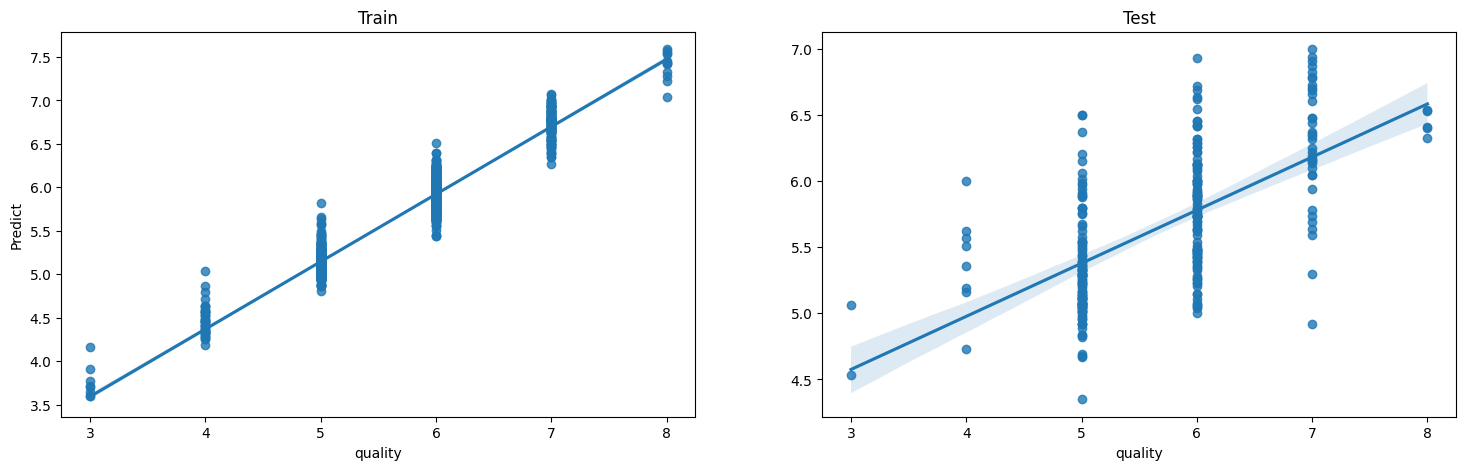

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(18,5), nrows=1, ncols=2)
sns.regplot(x=y_train, y=y_pred_train, ax=ax[0])
sns.regplot(x=y_test, y=y_pred_test, ax=ax[1])
ax[0].set_ylabel('Predict')
ax[0].set_title('Train')
ax[1].set_title('Test');

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error


def adjusted_r2(y_esperado, y_previsto, X_treino):
  R2 = r2_score(y_esperado, y_previsto)
  N = len(y_esperado)
  p = X_treino.shape[1]

  r2_ajustado = (1 - ((1 - R2) * (N - 1)) / (N - p - 1))
  return r2_ajustado

r2_ajustado = adjusted_r2(y_test, y_pred_test, X_train)
print('R2 Ajustado:', r2_ajustado)
print()
mae = mean_absolute_error(y_test, y_pred_test)
print('MAE:', mae)

mse = mean_squared_error(y_test, y_pred_test)
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

def calcular_rmsle(y_true, y_pred):
    """
    Calcula o RMSLE (Root Mean Squared Logarithmic Error) manualmente.
    """
    # Adicionar 1 aos valores para evitar problemas com log(0)
    log_true = np.log(y_true + 1)
    log_pred = np.log(y_pred + 1)

    # Calcular o erro logarítmico quadrado
    log_error_squared = (log_pred - log_true) ** 2

    # Calcular a média do erro
    mean_log_error = np.mean(log_error_squared)

    # Retornar a raiz quadrada da média
    return np.sqrt(mean_log_error)

rmsle = calcular_rmsle(y_test, y_pred_test)
print('RMSLE:', rmsle)
print()

m_error = max_error(y_test, y_pred_test)
print('Max Error:', m_error)

mape = mean_absolute_percentage_error(y_test, y_pred_test)
print('MAPE:', mape)


R2 Ajustado: 0.3591873991996444

MAE: 0.4947058823529411
MSE: 0.43128529411764704
RMSE: 0.656723148760303
RMSLE: 0.10027926652974282

Max Error: 2.08
MAPE: 0.08962443102240895


# **NOVA FEATURE SELECTION**

In [ ]:
from feature_engine.selection import SelectByShuffling

X_train_transformed = data_power_pipe.fit_transform(X_train)
X_test_transformed  = data_power_pipe.transform(X_test)

shuffle = SelectByShuffling(estimator=RandomForestRegressor(), scoring='neg_mean_absolute_error', cv=5)

shuffle.fit(X_train_transformed, y_train)

print(f"Qtde de variáveis antes da remoção: {X_train_transformed.shape[1]}")
print(f"Qtde de variáveis a serem removidas: {len(shuffle.features_to_drop_)}")
print(f"Qtde de variáveis depois da remoção: {X_train_transformed.shape[1] - len(shuffle.features_to_drop_)}")

X_train_transformed_reduzido = shuffle.transform(X_train_transformed)
X_test_transformed_reduzido  = shuffle.transform(X_test_transformed)

randonforest = RandomForestRegressor(random_state=42)

randonforest.fit(X_train_transformed_reduzido, y_train)

y_pred_train = randonforest.predict(X_train_transformed_reduzido)
y_pred_test  = randonforest.predict(X_test_transformed_reduzido)

Qtde de variáveis antes da remoção: 11
Qtde de variáveis a serem removidas: 7
Qtde de variáveis depois da remoção: 4


In [ ]:
r2_ajustado = adjusted_r2(y_test, y_pred_test, X_train)
print('R2 Ajustado:', r2_ajustado)
print()
mae = mean_absolute_error(y_test, y_pred_test)
print('MAE:', mae)

mse = mean_squared_error(y_test, y_pred_test)
print('MSE:', mse)

rmse = np.sqrt(mse)
print('RMSE:', rmse)

def calcular_rmsle(y_true, y_pred):
    """
    Calcula o RMSLE (Root Mean Squared Logarithmic Error) manualmente.
    """
    # Adicionar 1 aos valores para evitar problemas com log(0)
    log_true = np.log(y_true + 1)
    log_pred = np.log(y_pred + 1)

    # Calcular o erro logarítmico quadrado
    log_error_squared = (log_pred - log_true) ** 2

    # Calcular a média do erro
    mean_log_error = np.mean(log_error_squared)

    # Retornar a raiz quadrada da média
    return np.sqrt(mean_log_error)

rmsle = calcular_rmsle(y_test, y_pred_test)
print('RMSLE:', rmsle)
print()
m_error = max_error(y_test, y_pred_test)
print('Max Error:', m_error)

mape = mean_absolute_percentage_error(y_test, y_pred_test)
print('MAPE:', mape)

R2 Ajustado: 0.3448000666370239

MAE: 0.5005882352941178
MSE: 0.4409683823529412
RMSE: 0.6640545025469982
RMSLE: 0.10155343327152855

Max Error: 2.0199999999999996
MAPE: 0.09072544642857144


### **Conclusão:**
Nenhuma modelo foi eficaz já que se trata de uma base que classifica a nota dos vinhos. Nesse caso, não envolve apenas as variáveis quantitativas registradas na base, foi considerado também, para nota do vinho, as variáveis emocionais e pessoais do avaliador que não foram capturadas nesse estudo.
